,data_type,species,diff_ratio,r_avg,r_std
40,HybridR10v2,Lactobacillus,0.2972,0.369418,0.374637
41,HybridR10v2,Bacillus,-0.0147,1.293362,1.026667
42,HybridR10v2,Listeria,-0.0183,1.273562,1.022390
43,HybridR10v2,Staphylococcus,-0.0227,1.296690,1.118842
44,HybridR10v2,Enterococcus,-0.0270,1.191372,0.946871



align RMSE:  13.425580806803106
adjust RMSE:  7.781706608299287


,species,align_ratio,pred_ratio
40,Lactobacillus,41.72,24.44
41,Bacillus,10.53,18.07
42,Listeria,10.17,17.55
43,Staphylococcus,9.73,20.78
44,Enterococcus,9.30,13.81


<IPython.core.display.Javascript object>


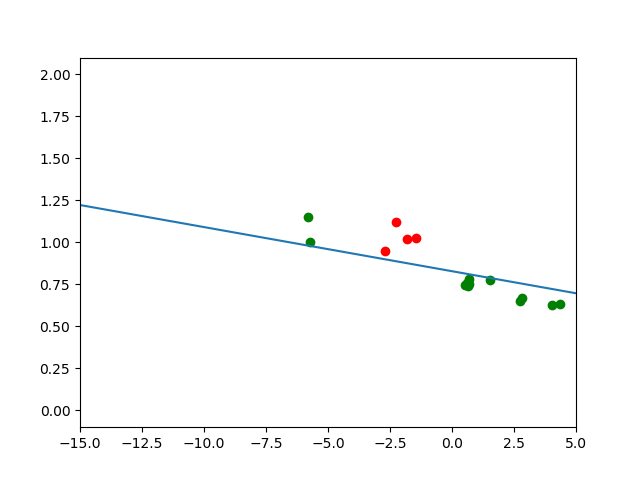

In [8]:
%matplotlib notebook
%run data_path.ipynb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from mpl_toolkits import mplot3d
import numpy as np

loman = [7.32,  2.56,  0.24, -0.72, -2.01, -2.07, -2.30, -2.72, -0.08, -0.22]

sample="HybridR10v2"
k=1
truer = [12] * 5
gram = gram_pos
regr_df = pd.read_excel("regression_data.xlsx")
# regr_df.rename(columns={"ratio diff.":"diff_ratio", "relative avg":"r_avg", "relative std":"r_std"}, inplace=True)
# print(regr_df.columns.values)
test_df = regr_df[regr_df.data_type == sample]
train_df = regr_df[regr_df.data_type != sample]
train_df = train_df[train_df.data_type != "BBv1"]
train_df = train_df[train_df.data_type != "MPZv1"]
# display(train_df)

train_df = train_df[train_df.species.isin(gram)]
test_df = test_df[test_df.species.isin(gram)]
# train_df = train_df[~train_df.species.isin(fungi)]
# test_df = test_df[~test_df.species.isin(fungi)]
# train_df = train_df[train_df.species != "Lactobacillus"]
# test_df = test_df[test_df.species != "Lactobacillus"]
display(test_df)

train_x = train_df["r_std"].values.tolist()
train_y = train_df["diff_ratio"].values.tolist()
# train_x = [[x*100,y*100] for x,y in train_x]
train_y = [x*100 for x in train_y]
test_x = test_df["r_std"].values.tolist()
test_y = test_df["diff_ratio"].values.tolist()
# test_x = [[x*100,y*100] for x,y in test_x]
test_y = [x*100 for x in test_y]
# print(test_y)

poly = PolynomialFeatures(degree=k)
X_ = np.array(train_x)
tX_ = np.array(test_x)
# X_ = np.hstack([X_**(i+1) for i in np.arange(k)])
# testX_ = np.hstack([tX_**(i+1) for i in np.arange(k)])
# np.append(X_,[1])
# np.append(testX_,[1])
X_ = X_.reshape(-1,1)
X_ = poly.fit_transform(X_)
tX_ =tX_.reshape(-1,1)
testX_ = poly.fit_transform(tX_)
model = LinearRegression()
model.fit(X_, train_y)
pred_y = model.predict(testX_)
print()

pred_df = test_df.copy()
pred_df.drop(["data_type","r_avg","r_std"], inplace=True, axis=1)
pred_df.insert(loc=2,column="pred_ratio", value=pred_y)

pred_df.diff_ratio = pred_df.diff_ratio * 100 + 12
pred_df.rename(columns={"diff_ratio":"align_ratio"}, inplace=True)
pred_df.eval('pred_ratio = align_ratio - pred_ratio', inplace=True)
print("align RMSE: ",np.sqrt(mean_squared_error(truer, pred_df['align_ratio'])))
print("adjust RMSE: ",np.sqrt(mean_squared_error(truer, pred_df['pred_ratio'])))
display(pred_df.round(2))

line_x1 = np.linspace(0,2,100)

x1 =line_x1.reshape(-1,1)
x1 = poly.fit_transform(x1)
line_y = model.predict(x1)
plt.xlim(-15,5)
plt.plot(line_y,line_x1)
plt.scatter(train_y,train_x,c='g')
plt.scatter(test_y,test_x,c='r')




In [6]:
import pandas as pd
regr_df = pd.read_excel("regression_data.xlsx")
for index,row in regr_df.iterrows():
    print(regr_df.iloc[index,:])
    print(index)

data_type         BBv2
species       Bacillus
diff_ratio     0.08535
r_avg         0.901639
r_std         0.629348
Name: 0, dtype: object
0
data_type              BBv2
species       Lactobacillus
diff_ratio        0.0436306
r_avg              0.644803
r_std              0.632986
Name: 1, dtype: object
1
data_type          BBv2
species        Listeria
diff_ratio    0.0282635
r_avg          0.927714
r_std          0.668012
Name: 2, dtype: object
2
data_type             BBv2
species       Enterococcus
diff_ratio      0.00676434
r_avg             0.932696
r_std             0.751467
Name: 3, dtype: object
3
data_type               BBv2
species       Staphylococcus
diff_ratio        0.00587054
r_avg               0.921642
r_std               0.758139
Name: 4, dtype: object
4
data_type            BBv2
species       Escherichia
diff_ratio     -0.0518296
r_avg             1.57255
r_std             1.55009
Name: 5, dtype: object
5
data_type           BBv2
species       Salmonella
diff_ratio    -